## INFX 574 Problem Set 4
#### Prateek Tripathi

In [1]:
# import the modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

## 1) Explore the Data
### 1.1) Load the data. You may drop id or just ignore it in the rest of your analysis.

In [2]:
# import the wisconsin breast cancer dataset
wdbc = pd.read_csv("wdbc.csv.bz2")

# drop the 'id' column from the dataframe
wdbc = wdbc.drop(["id"], axis = 1)

### 1.2) Create a summary table where you show means, ranges, and number of missings for each variable. In addition, add correlation between the diagnosis and the corresponding feature. You may include more statistics you consider useful.

In [3]:
# get the first ten values
print("First Ten Observations:\n")

wdbc.head(10)

First Ten Observations:



,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [4]:
# get the info of the dataframe
print("Column Information:\n")

wdbc.info()

Column Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis            569 non-null object
radius.mean          569 non-null float64
texture.mean         569 non-null float64
perimeter.mean       569 non-null float64
area.mean            569 non-null float64
smoothness.mean      569 non-null float64
compactness.mean     569 non-null float64
concavity.mean       569 non-null float64
concpoints.mean      569 non-null float64
symmetry.mean        569 non-null float64
fracdim.mean         569 non-null float64
radius.se            569 non-null float64
texture.se           569 non-null float64
perimeter.se         569 non-null float64
area.se              569 non-null float64
smoothness.se        569 non-null float64
compactness.se       569 non-null float64
concavity.se         569 non-null float64
concpoints.se        569 non-null float64
symmetry.se          569 non-null float64
fracdim.se           569 non-null f

In [5]:
# transform the 'diagnosis' column as 1 for 'malignant' and 0 for 'benign'
diagnosis = [1 if value == 'M' else 0 for value in wdbc['diagnosis']]

wdbc = pd.concat([wdbc, pd.DataFrame({'encoded_diagnosis': diagnosis})], axis = 1)

wdbc = wdbc.drop('diagnosis', axis = 1)

In [6]:
# describe the dataframe
wdbc_summary = wdbc.describe().transpose()
wdbc_summary.columns = ['Count', 'Mean', 'Standard Deviation', 'Minimum', '25%', '50%', '75%', 'Maximum']
wdbc_summary['Range'] = wdbc_summary['Maximum'] - wdbc_summary['Minimum']

# number of missing values
wdbc_missing = wdbc.isnull().sum().to_frame(name = "Number of Missing Values")

# correlation of 'diagnosis' with corresponding features
wdbc_diagnosis_corr = wdbc.corr()['encoded_diagnosis'].to_frame('Correlation (Diagnosis)')

# concat the three dataframes
wdbc_summary = pd.concat([wdbc_summary, wdbc_missing, wdbc_diagnosis_corr], axis = 1)

print("Summary Table:\n")

# drop the original diagnosis column
wdbc_summary

Summary Table:



,Count,Mean,Standard Deviation,Minimum,25%,50%,75%,Maximum,Range,Number of Missing Values,Correlation (Diagnosis)
radius.mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,21.129000,0,0.730029
texture.mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,29.570000,0,0.415185
perimeter.mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,144.710000,0,0.742636
area.mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,2357.500000,0,0.708984
smoothness.mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,0.110770,0,0.358560
compactness.mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,0.326020,0,0.596534
concavity.mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,0.426800,0,0.696360
concpoints.mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,0.201200,0,0.776614
symmetry.mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,0.198000,0,0.330499
fracdim.mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,0.047480,0,-0.012838


### 1.3) Graphical exploration. Make a number of scatterplots where you explore the relationship between features and the diagnosis. Note: you may attempt to display all 435 possible combinations as a scatterplot matrix, but that will most likely be just unreadable. Choose instead a few cases with higher correlation. Avoid overwhelming your reader with tens of similar figures.

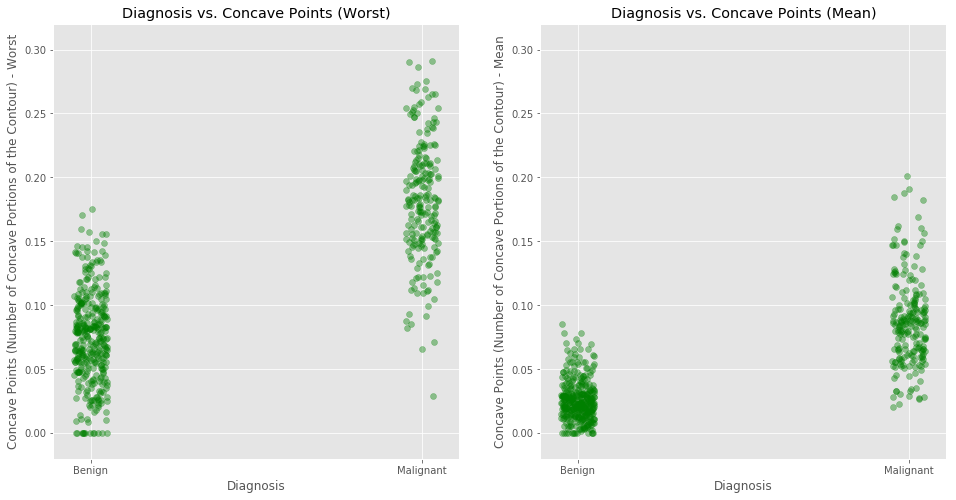

In [7]:
plt.style.use('ggplot')                                #select the 'ggplot' style
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.scatter(wdbc.encoded_diagnosis + np.random.uniform(-0.05,0.05, size= 569), 
            wdbc['concpoints.worst'], alpha = 0.4, c = 'green')
                                                       # scatter plot
plt.title("Diagnosis vs. Concave Points (Worst)")      # define the title
plt.ylabel("Concave Points (Number of Concave Portions of the Contour) - Worst")
                                                       # define the y-label
plt.xlabel("Diagnosis")                                # define the x-label
plt.xticks([0.0, 1.0], ['Benign', 'Malignant'])        # give the x-ticks
plt.ylim(-0.02, 0.32)                                  # define y-axis limits

plt.subplot(1, 2, 2)
plt.scatter(wdbc.encoded_diagnosis + np.random.uniform(-0.05,0.05, size= 569), 
            wdbc['concpoints.mean'], alpha = 0.4, c = 'green')
                                                       # scatter plot
plt.title("Diagnosis vs. Concave Points (Mean)")       # define the title
plt.ylabel("Concave Points (Number of Concave Portions of the Contour) - Mean")
                                                       # define the y-label
plt.xlabel("Diagnosis")                                # define the x-label
plt.xticks([0.0, 1.0], ['Benign', 'Malignant'])        # give the x-ticks
plt.ylim(-0.02, 0.32)                                  # define y-axis limits

plt.show()                                             # show the plot

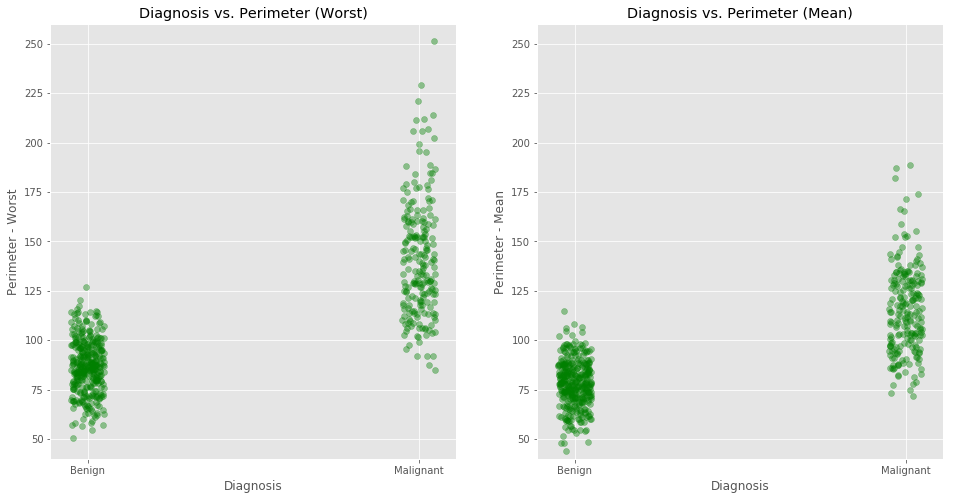

In [8]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.scatter(wdbc.encoded_diagnosis + np.random.uniform(-0.05,0.05, size= 569), 
            wdbc['perimeter.worst'], alpha = 0.4, c = 'green')
                                                       # scatter plot
plt.title("Diagnosis vs. Perimeter (Worst)")           # define the title
plt.ylabel("Perimeter - Worst")
                                                       # define the y-label
plt.xlabel("Diagnosis")                                # define the x-label
plt.xticks([0.0, 1.0], ['Benign', 'Malignant'])        # give the x-ticks
plt.ylim(40, 260)                                      # define y-axis limits

plt.subplot(1, 2, 2)
plt.scatter(wdbc.encoded_diagnosis + np.random.uniform(-0.05,0.05, size= 569), 
            wdbc['perimeter.mean'], alpha = 0.4, c = 'green')
                                                       # scatter plot
plt.title("Diagnosis vs. Perimeter (Mean)")            # define the title
plt.ylabel("Perimeter - Mean")
                                                       # define the y-label
plt.xlabel("Diagnosis")                                # define the x-label
plt.xticks([0.0, 1.0], ['Benign', 'Malignant'])        # give the x-ticks
plt.ylim(40, 260)                                      # define y-axis limits

plt.show()                                             # show the plot

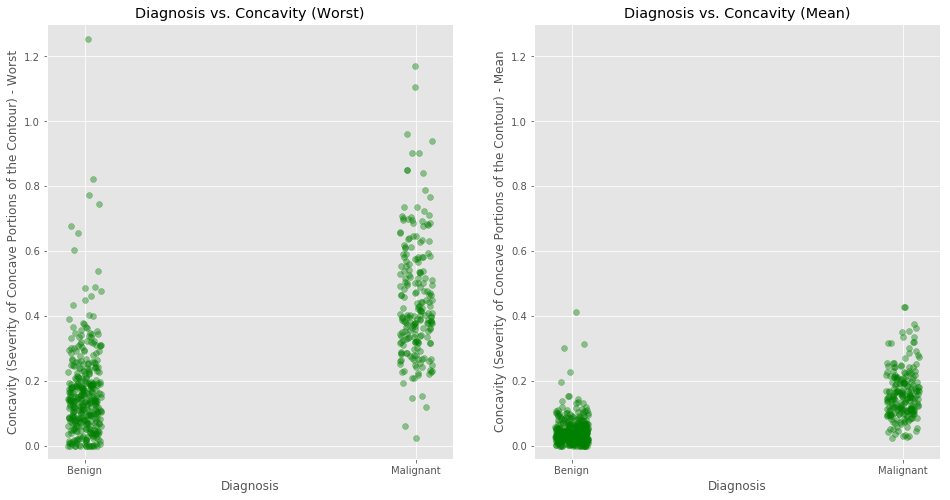

In [9]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.scatter(wdbc.encoded_diagnosis + np.random.uniform(-0.05,0.05, size= 569), 
            wdbc['concavity.worst'], alpha = 0.4, c = 'green')
                                                       # scatter plot
plt.title("Diagnosis vs. Concavity (Worst)")           # define the title
plt.ylabel("Concavity (Severity of Concave Portions of the Contour) - Worst")
                                                       # define the y-label
plt.xlabel("Diagnosis")                                # define the x-label
plt.xticks([0.0, 1.0], ['Benign', 'Malignant'])        # give the x-ticks
plt.ylim(-0.04, 1.3)                                   # define y-axis limits

plt.subplot(1, 2, 2)
plt.scatter(wdbc.encoded_diagnosis + np.random.uniform(-0.05,0.05, size= 569), 
            wdbc['concavity.mean'], alpha = 0.4, c = 'green')
                                                       # scatter plot
plt.title("Diagnosis vs. Concavity (Mean)")            # define the title
plt.ylabel("Concavity (Severity of Concave Portions of the Contour) - Mean")
                                                       # define the y-label
plt.xlabel("Diagnosis")                                # define the x-label
plt.xticks([0.0, 1.0], ['Benign', 'Malignant'])        # give the x-ticks
plt.ylim(-0.04, 1.3)                                   # define y-axis limits

plt.show()                                             # show the plot

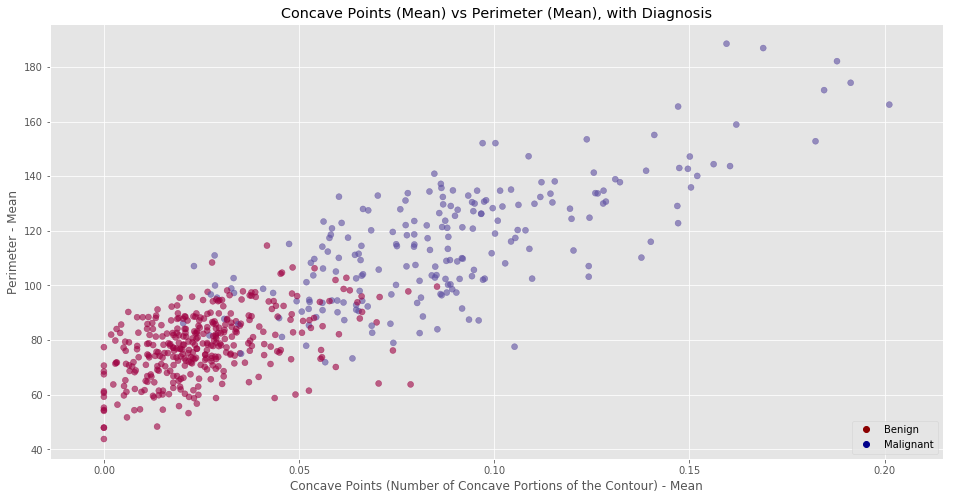

In [10]:
# import 'Line2D' from matplotlib.lines module
from matplotlib.lines import Line2D

plt.figure(figsize=(16,8))                             # define the figure size                         
plt.scatter(wdbc['concpoints.mean'], wdbc['perimeter.mean'], alpha = 0.6, 
            c = wdbc.encoded_diagnosis, cmap = 'Spectral')
                                                       # make the plot
legend_elements = [Line2D([0], [0], marker='o', color='darkred', label='Benign',
                          markerfacecolor='darkred', markersize=6, ls = 'None'), 
                   Line2D([0], [0], marker='o', color='darkblue', label='Malignant',
                          markerfacecolor='darkblue', markersize=6, ls = 'None')]
                                                       # define the legend elements
plt.legend(handles = legend_elements, loc = 4)         # make the legend
plt.title("Concave Points (Mean) vs Perimeter (Mean), with Diagnosis")
                                                       # give the title
plt.ylabel("Perimeter - Mean")                         # give the y-axis label
plt.xlabel("Concave Points (Number of Concave Portions of the Contour) - Mean")
                                                       # give the x-axis label
plt.show()                                             # show the plot

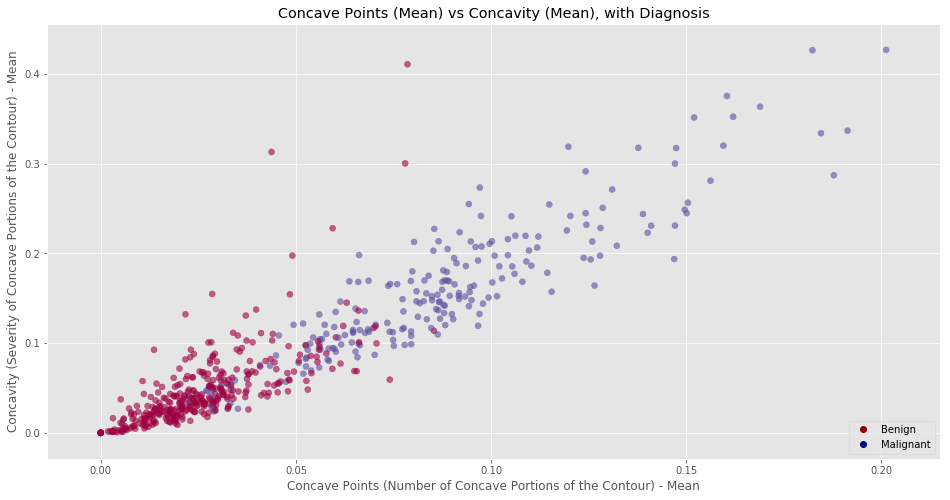

In [11]:
plt.figure(figsize=(16,8))                             # define the figure size                         
plt.scatter(wdbc['concpoints.mean'], wdbc['concavity.mean'], alpha = 0.6, 
            c = wdbc.encoded_diagnosis, cmap = 'Spectral')
                                                       # make the plot
plt.legend(handles = legend_elements, loc = 4)         # make the legend
plt.title("Concave Points (Mean) vs Concavity (Mean), with Diagnosis")
                                                       # give the title
plt.ylabel("Concavity (Severity of Concave Portions of the Contour) - Mean")  
                                                       # give the y-axis label
plt.xlabel("Concave Points (Number of Concave Portions of the Contour) - Mean")
                                                       # give the x-axis label
plt.show()                                             # show the plot

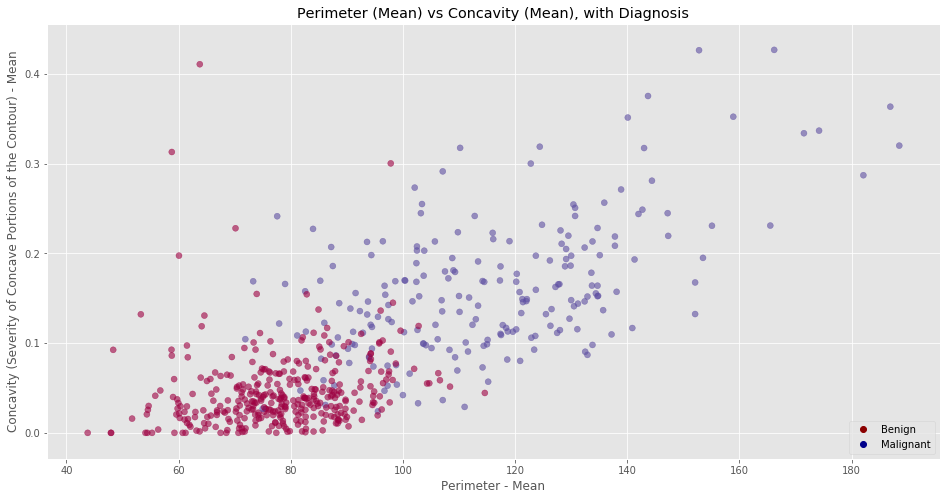

In [12]:
plt.figure(figsize=(16,8))                             # define the figure size                         
plt.scatter(wdbc['perimeter.mean'], wdbc['concavity.mean'], alpha = 0.6, 
            c = wdbc.encoded_diagnosis, cmap = 'Spectral')
                                                       # make the plot
plt.legend(handles = legend_elements, loc = 4)         # make the legend
plt.title("Perimeter (Mean) vs Concavity (Mean), with Diagnosis")
                                                       # give the title
plt.ylabel("Concavity (Severity of Concave Portions of the Contour) - Mean")    
                                                       # give the y-axis label
plt.xlabel("Perimeter - Mean")                         # give the x-axis label
plt.show()                                             # show the plot

## 2) Decision Boundary
### 2.1.1) Predict the diagnosis on a grid (say, 100x100) that covers the range of the explanatory variables. Use kNN with k = 3..7 (pick just one value). This gives you 100x100 predicted diagnoses. Note: if your features are of very different scale, you should either scale these into a roughly equal scale, or use a metric that does this with you. Consult James et al. (2015, p 217).
### 2.1.2) Plot the actual data and the decision boundary on the same plot. Ensure that actual observations and predictions are clearly distinguishable, and that one can easily understand the color code.

In [13]:
# knn decision boundary using concave points and perimeter

# min-max scaler()
scaler = MinMaxScaler()

scaler.fit(wdbc)

# create a dataframe with scaled values
scaled_wdbc = pd.DataFrame(scaler.transform(wdbc), columns = list(wdbc.columns.values))

In [14]:
# prepare the features and target
X = scaled_wdbc[['concpoints.mean', 'perimeter.mean']]
y = scaled_wdbc['encoded_diagnosis']

# train the k-neighbors classifier
cancer_classifier_one = KNeighborsClassifier(p = 2)

cancer_classifier_one.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
# define the light color map
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# create 1000 * 1000 grid points
dx = X.iloc[:, 0].max() - X.iloc[:, 0].min()
dy = X.iloc[:, 1].max() - X.iloc[:, 1].min()
    
# define the maximum and minimum axis
x_min, x_max = X.iloc[:, 0].min() - (0.1 * dx), X.iloc[:, 0].max() + (0.1 * dx)
y_min, y_max = X.iloc[:, 1].min() - (0.1 * dy), X.iloc[:, 1].max() + (0.1 * dy)
   
# create the grid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))

# define a function to create the 1000 * 1000 grid and plot the decision boundary
def decision_boundary(xx, yy, Z, title):    
    """This function accepts the training set dataframe and creates a decision boundary 
    for the 1000 by 1000 grid and visualizes the outcome of the classification"""
    
    # plot the grid outcome
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(16,8))
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light, alpha = 0.5)

    # plot the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = y, cmap = 'Spectral', 
                edgecolor = 'white', s = 50)
                                                     # plot the training observations
    plt.xlim(xx.min(), xx.max())                     # define the x-axis limits 
    plt.ylim(yy.min(), yy.max())                     # define the y-axis limits
    plt.xlabel("'" + str(X.columns.values[0]) + "'") # give the x-axis label
    plt.ylabel("'" + str(X.columns.values[1]) + "'") # give the y-axis label
    plt.title(title + ": Cancer (Benign / Malignant)")

    plt.legend(handles = legend_elements, loc = 4)   # make the legend

                                                     # give the title
    plt.show()

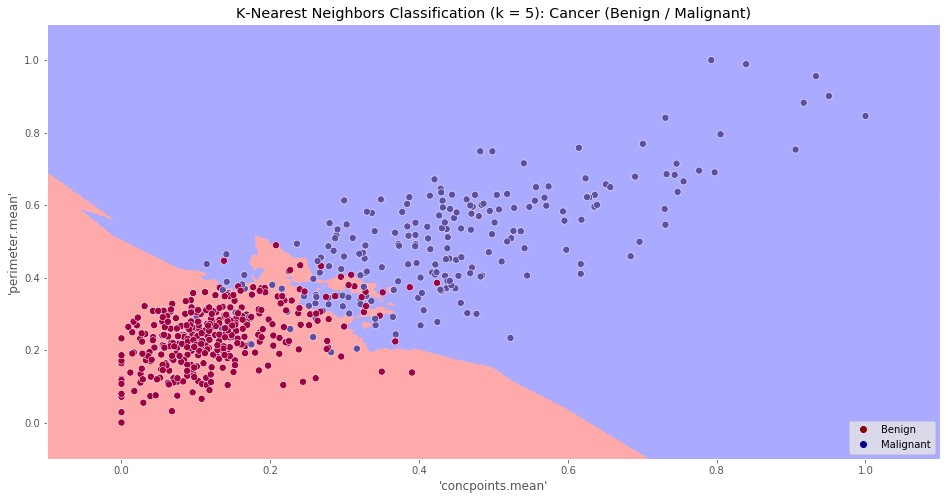

In [16]:
gridX = np.c_[xx.ravel(), yy.ravel()]
    
# predict the classification for the grid
Z = cancer_classifier_one.predict(gridX)

# plot the decision boundary
decision_boundary(xx, yy, Z, 'K-Nearest Neighbors Classification (k = 5)')

### 2.1.3) Describe your observations. How good is kNN in picking up the actual shape? Does it also pick up noise? Note: unless you do cross-validation, you cannot know if the model picks up noise (overfit). Here I just ask your best judgement, not any formal analysis.

Answer: kNN is reasonably good at picking up the actual shape of the training set. 

Yes, I believe that it does picks up noise (overfit) as we observe the decision boundary to be overly flexible (uneven and rough) as per the training set. As per the decision boundary, we observe that it rarely misclassifies the training set which suggests that it may overfit (training error is low), and may result in comparatively higher test error.

### 2.2.1) Fit a logistic regression model with these two features.
### 2.2.2)  Predict the diagnosis on a similar grid. . .
### 2.2.3)  . . . and create a similar plot.

In [17]:
# train the logistic regression classifier
cancer_classifier_two = LogisticRegression()

cancer_classifier_two.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

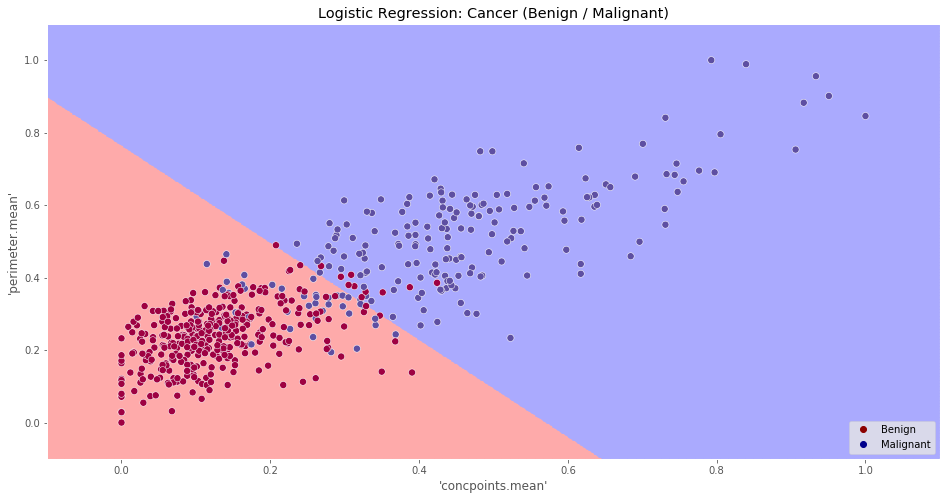

In [18]:
# predict the classification for the grid
Z = cancer_classifier_two.predict(gridX)

# plot the decision boundary
decision_boundary(xx, yy, Z, 'Logistic Regression')

### 2.2.4) Describe your observations. How does the result for kNN compare to that for Logistic Regression?

Answer: Decision boundary for the 'Logistic Regression' is smoother if we compare with the 'kNN Classification'. We do not observe noise (overfit) in the 'Logistic Regression' model. Training error may not be as low as what we observed for the 'kNN Classification', and the decision boundary doesn't seem to be flexible according to the training set. Number of misclassified observations are higher as compared to the 'kNN Classification'. This suggests that this model doesn't overfit the data, and may give comparatively lower test error.

### 2.3.1) Use these two features to compute some new ones. Let's denote your original features by x and y. Examples you may create include: x2, y2, x.y, 1(x > 5), 1(y < 1) .x2, log x . . . You can use all sorts of mathematical operations as long as a) you only use x and y, not other features, and b) the original and the engineered features remain linearly independent (they are, unless you create features like a.x + b.y).

In [19]:
# second order features
X.loc[:, 'concpoints.mean.squared'] = X.loc[:, 'concpoints.mean'] ** 2
X.loc[:, 'perimeter.mean.squared'] = X.loc[:, 'perimeter.mean'] ** 2
X.loc[:, 'concpoints.mean.perimeter.mean'] = X.loc[:, 'concpoints.mean'] * X.loc[:, 'perimeter.mean']

# third order features
X.loc[:, 'concpoints.mean.cubed'] = X.loc[:, 'concpoints.mean'] ** 3
X.loc[:, 'perimeter.mean.cubed'] = X.loc[:, 'perimeter.mean'] ** 3
X.loc[:, 'concpoints.mean.squared.perimeter.mean'] = (X.loc[:, 'concpoints.mean'] ** 2) * X.loc[:, 'perimeter.mean']
X.loc[:, 'concpoints.mean.perimeter.mean.squared'] = X.loc[:, 'concpoints.mean'] * (X.loc[:, 'perimeter.mean'] ** 2)

C:\Users\prate\Anaconda3\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\prate\Anaconda3\lib\site-packages\pandas\core\indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


### 2.3.2) Fit a logistic regression model. However, this time pick both x, y, and some of your engineered features.

In [20]:
# train the logistic regression classifier with engineered features
cancer_classifier_three = LogisticRegression()

cancer_classifier_three.fit(X.iloc[:, :5], y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 2.3.3) Create the decision boundary plot.

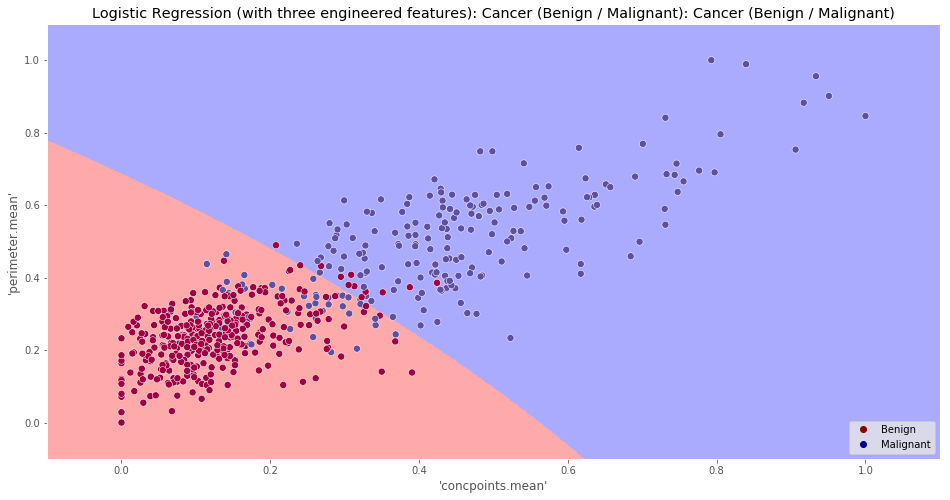

In [21]:
# create the engineered parameters for the grid
xx_squared = xx ** 2
yy_squared = yy ** 2
xy = xx * yy

gridX_two = np.c_[xx.ravel(), yy.ravel(), xx_squared.ravel(), yy_squared.ravel(), xy.ravel()]
    
# predict the classification for the grid
Z = cancer_classifier_three.predict(gridX_two)
    
decision_boundary(xx, yy, Z, "Logistic Regression (with three engineered features): Cancer (Benign / Malignant)")

### 2.3.4) Comment on the shape of the boundary. What do you think, how well can you capture the actual boundary? What about overfitting? (Again, I ask about your judgement, not about any formal analysis).

Answer: The shape of the decision boundary gets slightly curved upon the addition of second order terms (x2, y2, and xy).

In my opinion, we capture the decision boundary in a better way than we did without the second order terms but we risk overfitting (with the addition of these terms) as it results in the increase of variance. 

Higher variance may lead to lower training set error but may result in the increase of test set error after a certain limit.

### 2.3.5) Repeat the exercise a few times where you pick/engineer different new features, and try to get as reasonable boundary as you can.

In [22]:
# train the logistic regression classifier with engineered features
cancer_classifier_four = LogisticRegression()

cancer_classifier_four.fit(X.iloc[:, :7], y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

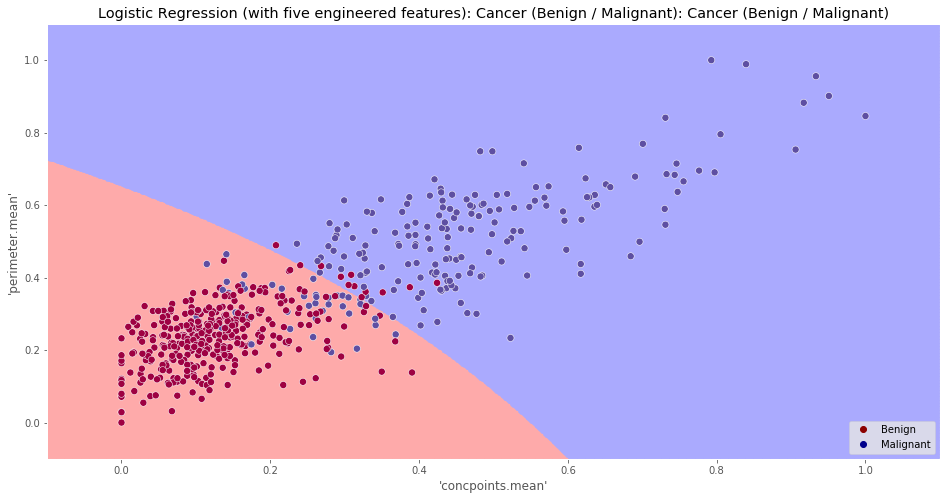

In [23]:
# create the engineered parameters for the grid
xx_cubed = xx ** 3
yy_cubed = yy ** 3
x_squared_y = (xx ** 2) * yy
x_y_squared = xx * (yy ** 2)

gridX_three = np.c_[xx.ravel(), yy.ravel(), xx_squared.ravel(), yy_squared.ravel(), xy.ravel(), 
                    xx_cubed.ravel(), yy_cubed.ravel()]
    
# predict the classification for the grid
Z = cancer_classifier_four.predict(gridX_three)
    
decision_boundary(xx, yy, Z, "Logistic Regression (with five engineered features): Cancer (Benign / Malignant)")

In [24]:
# train the logistic regression classifier with engineered features
cancer_classifier_five = LogisticRegression()

cancer_classifier_five.fit(X.iloc[:, :9], y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

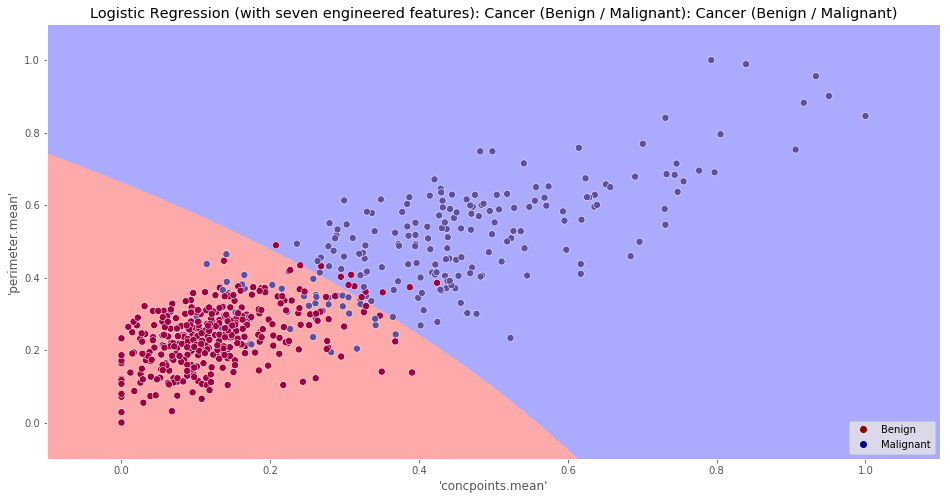

In [25]:
gridX_four = np.c_[xx.ravel(), yy.ravel(), xx_squared.ravel(), yy_squared.ravel(), xy.ravel(), 
                   xx_cubed.ravel(), yy_cubed.ravel(), x_squared_y.ravel(), x_y_squared.ravel()]
    
# predict the classification for the grid
Z = cancer_classifier_five.predict(gridX_four)
    
decision_boundary(xx, yy, Z, "Logistic Regression (with seven engineered features): Cancer (Benign / Malignant)")

## 3) Use the Full Data
### 3.1.1) 1. You should do k-fold CV (k > 10) with the following tasks: 
### (a) Fit logistic regression model on training data using all existing features. You may also add your engineered features if you wish.
### (b) Calculate accuracy, precision and recall on the validation data.

In [26]:
# define the cross validation function
def cross_validation(df, k, c):
    """This function accepts the complete dataframe and the number of k for k-fold validation,
    and performs the k-fold validation to return the average accuracy, precision, and recall"""
    
    np.random.seed(5)                                            # set seed
    indices = np.arange(len(df))                                 # get the range of indices
    np.random.shuffle(scaled_wdbc.index.values)                  # shuffle the index values
    
    # define arrays to store the accuracy, precision, and recall
    accuracy = []
    precision = []
    recall = []
    
    for i in range(k):       
    
        itest = indices[i::k]                                    # select the indices for test set
        itrain = list(set(indices).difference(itest))            # select the indices for train set
        
        test_set = df.iloc[itest]                                # define the test set
        train_set = df.iloc[itrain]                              # define the train set               
        
        # train the classifier
        cancer_classifier = LogisticRegression(C = c)
        cancer_classifier.fit(train_set.loc[:, train_set.columns != 'encoded_diagnosis'], 
                              train_set.loc[:, 'encoded_diagnosis'])
        y_predicted = cancer_classifier.predict(test_set.loc[:, test_set.columns != 'encoded_diagnosis'])
        
        # append the model performance parameters
        accuracy.append(accuracy_score(test_set['encoded_diagnosis'].values, y_predicted))
        precision.append(precision_score(test_set['encoded_diagnosis'].values, y_predicted))
        recall.append(recall_score(test_set['encoded_diagnosis'].values, y_predicted))
        
    # return statement    
    return np.mean(accuracy), np.mean(precision), np.mean(recall)

### 3.1.2) Report the average accuracy, precision, and recall over your CV runs.

In [27]:
# compute the average accuracy, precision and recall
average_accuracy, average_precision, average_recall = cross_validation(scaled_wdbc, 12, c = 1)

print("Average Accuracy: " + str(round(average_accuracy, 4)))
print("Average Precision: " + str(round(average_precision, 4)))
print("Average Recall: " + str(round(average_recall, 4)))

Average Accuracy: 0.9632
Average Precision: 0.9895
Average Recall: 0.9114


### 3.2.1) Pick a type of regularization (lasso, ridge, elastic net).

In [28]:
# ridge

### 3.2.2) Create a wide list of regularization parameters. And I mean wide, for instance ranging from 10-6 to 106. Pick a number of values lambda inside this range.

In [29]:
# create the list of regularization parameters
regularization_parameters = [10 ** x for x in range(-6, 6)]

### 3.2.3) For each lambda in this range, repeat the CV process in exercise 3.1 above. Compute accuracy, precision, and recall.

### 3.2.4) Report the results as a function of  lambda. This may be in the form of a table or a graph.

In [30]:
# perform cross-validation for ridge regression for each regularization paramter from 10 -7 to 10 7
ridge_df = pd.DataFrame.from_dict({(1 / x): cross_validation(scaled_wdbc, 12, c = x) 
                                   for x in regularization_parameters}, orient = 'index')

ridge_df.columns = ['Accuracy', 'Precision', 'Recall']
ridge_df.index.name = 'lambda Parameter'

# display the table
ridge_df

C:\Users\prate\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Accuracy,Precision,Recall
lambda Parameter,,,
1000000.00000,0.648530,0.583333,0.065144
100000.00000,0.650303,0.583333,0.070046
10000.00000,0.653812,0.666667,0.080810
1000.00000,0.702940,1.000000,0.216996
100.00000,0.882240,0.992424,0.684356
10.00000,0.927970,0.981151,0.817055
1.00000,0.963246,0.989542,0.911431
0.10000,0.977209,0.986953,0.953505
0.01000,0.977135,0.980972,0.958198


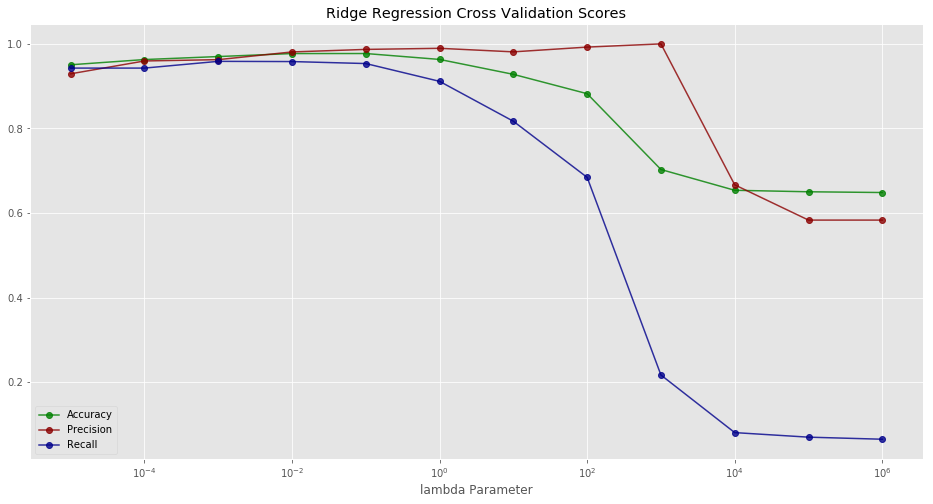

In [31]:
# display the graph
plt.figure(figsize=(16,8))                             # define the plot size
legend_elements = [Line2D([0], [0], marker = 'o', color = 'green', label = 'Accuracy',
                          markerfacecolor = 'green', markersize = 6, alpha = 0.8),
                   Line2D([0], [0], marker = 'o', color = 'darkred', label = 'Precision',
                          markerfacecolor = 'darkred', markersize = 6, alpha = 0.8),
                   Line2D([0], [0], marker = 'o', color = 'darkblue', label = 'Recall',
                          markerfacecolor = 'darkblue', markersize = 6, alpha = 0.8)]
                                                       # define the legend elements
plt.legend(handles = legend_elements, loc = 3)         # make the legend

plt.plot(ridge_df.index, ridge_df['Accuracy'], marker = 'o', c = 'green', alpha = 0.8)
                                                       # plot the accuracy
plt.plot(ridge_df.index, ridge_df['Precision'], marker = 'o', c = 'darkred', alpha = 0.8)
                                                       # plot the precision
plt.plot(ridge_df.index, ridge_df['Recall'], marker = 'o', c = 'darkblue', alpha = 0.8)
                                                       # plot the recall
plt.xlabel("lambda Parameter")                         # give the x-axis label
plt.title("Ridge Regression Cross Validation Scores")  # give the title
plt.xscale('log')                                      # set the x-axis on log scale
plt.show()

### 3.2.5) Report the best regularization parameters, and the best results.

Answer: We observe that the accuracy, precision and recall scores are similar for the lambda parameter from 1.00000 to 0.00001. On closer observation, 

0.01000 (lambda Parameter): 	

0.977135 (Accuracy) 	
0.980972 (Precision)	
0.958198 (Recall)	

, appears to give the best results. This suggests that the lambda ~ 0.01 gives the best results. However, it is difficult to figure out the best result based on the given information because we may want to maximize either one or combination of the three scores of accuracy, precision or recall which may require domain knowledge. 

Best Accuracy (lambda - 0.1): 0.977209	

Best Precision (lambda - 1000.00): 1.000000

Best Recall (lambda - 0.001): 0.958714	

## 4) ROC Curve: Which Estimator is the Best?
### 4.1) Split your data into testing and training sets (you may use sklearn.model_selection.train_test_split), say 1/3 for testing. Use all the features in the original data.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(scaled_wdbc.loc[:, scaled_wdbc.columns != 'encoded_diagnosis'], 
                                                    scaled_wdbc.loc[:, 'encoded_diagnosis'], test_size = 1/3, random_state = 1)

### 4.2) Using your training data, estimate (a few) k-NN models, Naive Bayes model, and logistic regression. Notes: in case of k-NN, you should use scaled features. In case of logistic regression, use the optimal regularization parameter value you found in 3.2.

In [33]:
# train the k-neighbors classifier k = [1, 5, 25]
cancer_classifier_knn_k1 = KNeighborsClassifier(n_neighbors = 1)
cancer_classifier_knn_k1.fit(X_train, y_train)

cancer_classifier_knn_k5 = KNeighborsClassifier(n_neighbors = 5)
cancer_classifier_knn_k5.fit(X_train, y_train)

cancer_classifier_knn_k25 = KNeighborsClassifier(n_neighbors = 25)
cancer_classifier_knn_k25.fit(X_train, y_train)

# train the naive bayes model
cancer_classifier_naivebayes = GaussianNB()
cancer_classifier_naivebayes.fit(X_train, y_train)

# train the logistic regression model
cancer_classifier_logistic = LogisticRegression(C = 100)
cancer_classifier_logistic.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 4.3) For each of the models, predict the probabilites on the test data. Note: you have to use predict_proba, not predict for logistic and NB regression.

In [34]:
# predict the probablities for the k-neighbours classifiers k = [1, 5, 25]
knn_k1_prob = cancer_classifier_knn_k1.predict_proba(X_test)

knn_k5_prob = cancer_classifier_knn_k5.predict_proba(X_test)

knn_k25_prob = cancer_classifier_knn_k25.predict_proba(X_test)

# predict the probablities for the naive bayes model
naivebayes_prob = cancer_classifier_naivebayes.predict_proba(X_test)

# predict the probablities for the logistic regression model
logistic_prob = cancer_classifier_logistic.predict_proba(X_test)

### 4.4) Pick a number of thresholds between 0 and 1 (for instance, 0, 0.1, 0.2, ...). For each model and each threshold, treat your predictions to be 1 if it it's probability is at least as big as the threshold.

In [35]:
# define the thresholds
thresholds = np.linspace(0, 1, 100)

# define a function to calculate the true positive and false positive rates for 
# the calculated probablities against the thresholds
def accuracy_rates(prob):
    """This function accepts the probablities for the classifier on the test data and 
    returns the true positive and flase positive rates"""
    
    tp_rates = []
    fp_rates = []
    
    for i in thresholds:
        
        tp_rate = sum(((prob[:, 1] >= i) == True) & (y_test == 1)) / sum(y_test)         # true positive rate
        fp_rate = sum((prob[:, 1] >= i) & (y_test == 0)) / (len(y_test) - sum(y_test))   # false positive rate
        
        tp_rates.append(tp_rate)
        fp_rates.append(fp_rate)
        
    # return statement    
    return tp_rates, fp_rates

### 4.5) Based on these predictions, compute false positive rate and true positive rate.

In [36]:
# compute false positive rate and true positive rate for k-neighbours classifiers k = [1, 5, 25]
knn_k1_tpr, knn_k1_fpr = accuracy_rates(knn_k1_prob)
knn_k5_tpr, knn_k5_fpr = accuracy_rates(knn_k5_prob)
knn_k25_tpr, knn_k25_fpr = accuracy_rates(knn_k25_prob)

# compute false positive rate and true positive rate for naive bayes model
naivebayes_tpr, naivebayes_fpr = accuracy_rates(naivebayes_prob)

# compute false positive rate and true positive rate for logistic regression model
logistic_tpr, logistic_fpr = accuracy_rates(logistic_prob)

### 4.6) Plot these rates for each threshold and model.

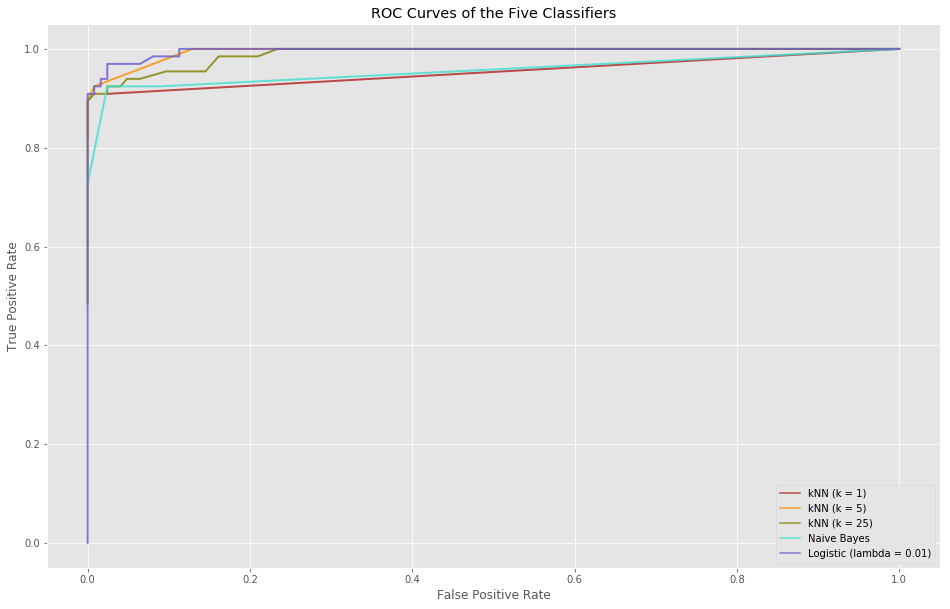

In [37]:
# display the graph
plt.figure(figsize=(16,10))                             # define the plot size
legend_elements = [Line2D([0], [0], color = 'firebrick', label = 'kNN (k = 1)', alpha = 0.8), 
                   Line2D([0], [0], color = 'darkorange', label = 'kNN (k = 5)', alpha = 0.8),
                   Line2D([0], [0], color = 'olive', label = 'kNN (k = 25)', alpha = 0.8),
                   Line2D([0], [0], color = 'turquoise', label = 'Naive Bayes', alpha = 0.8),
                   Line2D([0], [0], color = 'slateblue', label = 'Logistic (lambda = 0.01)', alpha = 0.8)]
                                                       # define the legend elements
plt.legend(handles = legend_elements, loc = 4)         # make the legend

plt.plot(knn_k1_fpr, knn_k1_tpr, alpha = 0.8, linewidth = 2, c = 'firebrick')
                                                       # plot the knn with k = 1 rates
plt.plot(knn_k5_fpr, knn_k5_tpr, alpha = 0.8, linewidth = 2, c = 'darkorange')
                                                       # plot the knn with k = 5 rates
plt.plot(knn_k25_fpr, knn_k25_tpr, alpha = 0.8, linewidth = 2, c = 'olive')
                                                       # plot the knn with k = 25 rates

plt.plot(naivebayes_fpr, naivebayes_tpr, alpha = 0.8, linewidth = 2, c = 'turquoise')
                                                       # plot the naive bayes rates
    
plt.plot(logistic_fpr, logistic_tpr, alpha = 0.8, linewidth = 2, c = 'slateblue')
                                                       # plot the logistic rates
plt.title("ROC Curves of the Five Classifiers")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

### 4.7) Comment your results. Which model is the best?

Answer: We observe that the logistic regression classifier with 'L2' regularization (lambda = 0.01) is the best model, indicating a high true positive rate and a low false positive rate with the highest area under the ROC curve.

Other models do not perform as well as the logistic regression model and appear to have lower area under the ROC curve.